In [1]:
import math
import pandas as pd
import psycopg2
import getpass
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from keras.models import Model, Sequential
from keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [6]:
!git clone https://github.com/bachannayak/sepsis_detect.git



fatal: destination path 'sepsis_detect' already exists and is not an empty directory.


In [25]:
sepsis_dataset=pd.read_csv('/content/sepsis_detect/dataset_sepsis.csv')


In [26]:
print(sepsis_dataset.shape)
print(sepsis_dataset.keys())
sepsis_dataset.describe()


(15538, 102)
Index(['Unnamed: 0', 'icustay_id', 'hadm_id', 'sepsis_explicit',
       'septic_shock_explicit', 'severe_sepsis_explicit', 'urineoutput',
       'heartrate_min', 'heartrate_max', 'sysbp_min',
       ...
       'peep', 'o2flow', 'requiredo2', 'mingcs', 'gcsmotor', 'gcsverbal',
       'gcseyes', 'endotrachflag', 'specimen', 'specimen_pred'],
      dtype='object', length=102)


,Unnamed: 0,icustay_id,hadm_id,sepsis_explicit,septic_shock_explicit,severe_sepsis_explicit,urineoutput,heartrate_min,heartrate_max,sysbp_min,sysbp_max,diasbp_min,diasbp_max,meanbp_min,meanbp_max,resprate_min,resprate_max,tempc_min,tempc_max,spo2_min,spo2_max,glucose_min,glucose_max,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,hematocrit_min,hematocrit_max,hemoglobin_min,...,extubated,selfextubated,ventnum,specimen_prob,so2,spo2,po2,pco2,fio2_chartevents,fio2,aado2,aado2_calc,pao2fio2,ph,baseexcess,bicarbonate,totalco2,hematocrit,hemoglobin,carboxyhemoglobin,methemoglobin,chloride,calcium,temperature,potassium,sodium,lactate,glucose,intubated,tidalvolume,ventilationrate,ventilator,peep,o2flow,requiredo2,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag
count,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,...,15538.0,15538.0,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.00000,15538.0,15538.000000,15538.0,15538.0,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000,15538.000000
mean,234612.157227,249605.095250,149883.312202,0.098983,0.072918,0.098919,262.967666,59.130667,67.605355,79.035912,98.640752,41.189728,54.289098,51.563715,68.164693,11.057408,15.971554,24.303379,24.400271,68.680203,70.991569,72.627365,78.714699,9.248037,9.919102,0.725801,0.735841,0.772043,0.875467,14.938087,15.514802,0.494884,0.524598,0.875827,0.932552,71.171322,73.389561,22.940321,25.545952,7.685635,...,0.0,0.0,0.703372,0.422775,7.057279,11.141267,88.201699,18.823722,7.046660,7.749910,22.929463,49.546852,50.562873,3.185078,0.497683,0.236646,10.668876,5.356223,1.782881,0.014629,0.009036,14.999871,0.223357,2.420768,0.802497,21.126786,0.739357,29.59480,0.0,45.595894,0.0,0.0,0.433389,0.117293,3.943043,9.457395,3.071824,1.678787,1.880873,0.274424
std,138361.169117,28829.042916,28859.230794,0.298649,0.260010,0.298563,364.961506,39.758089,45.089366,53.474789,65.578385,28.766919,37.190377,35.048274,46.339778,7.830945,11.056827,17.247026,17.314641,43.204317,44.398302,91.237264,100.078382,7.734633,8.388578,1.412177,1.429639,3.860346,4.237100,11.773917,12.147052,1.984632,2.078502,1.200895,1.285515,47.444922,48.933314,16.313136,17.734663,5.518264,...,0.0,0.0,0.928611,0.484840,25.091313,30.956749,129.688203,23.144450,22.981498,24.767764,100.575847,132.088311,282.550980,3.641272,1.736642,2.366019,12.788468,12.448024,4.143519,0.210603,0.517570,36.710738,0.449519,9.115418,1.681520,49.334183,1.716608,65.65734,0.0,149.384655,0.0,0.0,3.981789,1.882143,16.903199,6.951594,2.729719,2.261894,1.708960,0.446238
min,0.000000,200021.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-373.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [27]:
sepsis_dataset

,Unnamed: 0,icustay_id,hadm_id,sepsis_explicit,septic_shock_explicit,severe_sepsis_explicit,urineoutput,heartrate_min,heartrate_max,sysbp_min,sysbp_max,diasbp_min,diasbp_max,meanbp_min,meanbp_max,resprate_min,resprate_max,tempc_min,tempc_max,spo2_min,spo2_max,glucose_min,glucose_max,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,hematocrit_min,hematocrit_max,hemoglobin_min,...,ventnum,specimen_prob,so2,spo2,po2,pco2,fio2_chartevents,fio2,aado2,aado2_calc,pao2fio2,ph,baseexcess,bicarbonate,totalco2,hematocrit,hemoglobin,carboxyhemoglobin,methemoglobin,chloride,calcium,temperature,potassium,sodium,lactate,glucose,intubated,tidalvolume,ventilationrate,ventilator,peep,o2flow,requiredo2,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,specimen,specimen_pred
0,0,200021,109307,0,0,0,1120.0,66.0,83.0,94.0,107.0,63.0,78.0,76.0,84.0,11.0,18.0,0.000000,0.000000,100.0,100.0,127.0,127.0,17.0,17.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,1.0,1.0,107.0,107.0,37.3,37.3,13.0,...,1.0,1.000000,99.0,100.0,367.0,38.0,100.0,0.0,0.0,298.50,367.0,7.42,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,1.04,0.0,0.0,0.0,1.0,127.0,0,0.0,0,0,0.0,0.0,0.0,15.0,4.0,0.0,1.0,1.0,ART,ART
1,8,200028,181955,0,0,0,43.0,66.0,81.0,91.0,166.0,37.0,62.0,52.0,98.0,19.0,28.0,36.111111,36.555556,96.0,100.0,171.0,198.0,9.0,12.0,3.1,3.3,0.0,0.0,18.0,21.0,0.7,0.8,1.0,1.1,113.0,114.0,30.0,37.0,9.9,...,1.0,0.999999,0.0,0.0,328.0,43.0,0.0,0.0,0.0,0.00,0.0,7.17,0.0,0.0,17.0,37.0,12.4,0.0,0.0,114.0,1.22,0.0,3.8,138.0,1.6,245.0,0,0.0,0,0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
2,9,200028,181955,0,0,0,43.0,66.0,81.0,91.0,166.0,37.0,62.0,52.0,98.0,19.0,28.0,36.111111,36.555556,96.0,100.0,171.0,198.0,9.0,12.0,3.1,3.3,0.0,0.0,18.0,21.0,0.7,0.8,1.0,1.1,113.0,114.0,30.0,37.0,9.9,...,1.0,0.999998,0.0,0.0,314.0,50.0,0.0,0.0,0.0,0.00,0.0,7.18,0.0,0.0,20.0,34.0,11.3,0.0,0.0,113.0,1.17,0.0,3.6,140.0,2.1,194.0,0,0.0,0,0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
3,10,200028,181955,0,0,0,43.0,66.0,81.0,91.0,166.0,37.0,62.0,52.0,98.0,19.0,28.0,36.111111,36.555556,96.0,100.0,171.0,198.0,9.0,12.0,3.1,3.3,0.0,0.0,18.0,21.0,0.7,0.8,1.0,1.1,113.0,114.0,30.0,37.0,9.9,...,1.0,0.967132,0.0,0.0,106.0,49.0,0.0,0.0,0.0,0.00,0.0,7.22,0.0,0.0,21.0,34.0,11.3,0.0,0.0,113.0,1.14,0.0,4.2,140.0,1.3,168.0,0,0.0,0,0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
4,11,200028,181955,0,0,0,43.0,66.0,81.0,91.0,166.0,37.0,62.0,52.0,98.0,19.0,28.0,36.111111,36.555556,96.0,100.0,171.0,198.0,9.0,12.0,3.1,3.3,0.0,0.0,18.0,21.0,0.7,0.8,1.0,1.1,113.0,114.0,30.0,37.0,9.9,...,1.0,0.984288,0.0,0.0,123.0,48.0,0.0,0.0,0.0,0.00,0.0,7.22,0.0,0.0,21.0,32.0,10.6,0.0,0.0,114.0,1.13,0.0,4.3,139.0,1.7,172.0,0,0.0,0,0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15533,468488,299998,158288,1,0,1,400.0,65.0,69.0,127.0,152.0,50.0,86.0,74.0,116.0,8.0,17.0,36.777778,36.777778,100.0,100.0,130.0,130.0,14.0,14.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,1.0,1.0,104.0,112.0,32.0,40.0,10.4,...,1.0,0.999818,0.0,0.0,207.0,39.0,0.0,0.0,0.0,0.00,0.0,7.41,0.0,0.0,26.0,36.0,11.9,0.0,0.0,104.0,1.12,0.0,3.7,138.0,2.3,154.0,0,0.0,0,0,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART
15534,468489,299998,158288,1,0,1,400.0,65.0,69.0,127.0,152.0,50.0,86.0,74.0,116.0,8.0,17.0,36.777778,36.777778,100.0,100.0,130.0,130.0,14.0,14.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,1.0,1.0,104.0,112.0,32.0,40.0,10.4,...,1.0,0.996432,0.0,0.0,146.0,34.0,0.0,0.0,0.0,0.00,0.0,7.43,0.0,0.0,23.0,32.0,10.8,0.0,0.0,105.0,1.10,0.0,4.4,136.0,2.6,215.0,0,0.0,0,0,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART
15535,468490,299998,158288,1,0,1,400.0,65.0,69.0,127.0,152.0,50.0,86.0,74.0,116.0,8.0,17.0,36.

In [28]:
sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']==1]
not_sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']!=1]

In [29]:
sepsis['icustay_id'].count()

1538

In [30]:
not_sepsis['icustay_id'].count()

14000

In [31]:
X = sepsis_dataset.iloc[:,6:-2]
Y = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [32]:
model = Sequential()
model.add(Dense(units=128,input_shape=(94,),activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               12160     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 21,529
Trainable params: 21,529
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
389/389 [==============================] - 2s 3ms/step - loss: 0.3040 - accuracy: 0.8997 - val_loss: 0.2519 - val_accuracy: 0.9073
Epoch 2/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.9042 - val_loss: 0.2493 - val_accuracy: 0.9080
Epoch 3/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2549 - accuracy: 0.9075 - val_loss: 0.2517 - val_accuracy: 0.9106
Epoch 4/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2459 - accuracy: 0.9102 - val_loss: 0.2363 - val_accuracy: 0.9160
Epoch 5/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9116 - val_loss: 0.2455 - val_accuracy: 0.9134
Epoch 6/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9146 - val_loss: 0.2453 - val_accuracy: 0.9122
Epoch 7/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9155 - val_loss: 0.2422 - val_accuracy: 0.9109
Epoch 

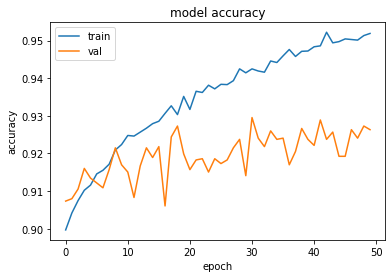

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
X = sepsis_dataset.iloc[:,6:-2]
y_true = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
y_pred = model.predict(X)
y_pred = np.round(y_pred)
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[13933    67]
 [  731   807]]
f1_score	:0.669154
recall_score	:0.524707
precision_score	:0.923341


In [37]:
#y_pred = sepsis_dataset['sepsis-3']
y_true = sepsis_dataset.iloc[:,3]
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[13933    67]
 [  731   807]]
f1_score	:0.669154
recall_score	:0.524707
precision_score	:0.923341
